<a href="https://colab.research.google.com/github/SathyaSudha-96/HeatFlux/blob/main/HeatFluxMLP_KerasRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/HeatFlux/Input.csv')

In [ ]:
df.head()

,Position,0,0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05,0.055,0.06,0.065,0.07,0.075,0.08,0.085,0.09,0.095,0.1,0.105,0.11,0.115,0.12,0.125,0.13,0.135,0.14,0.145,0.15,0.155,0.16,0.165,0.17,0.175,0.18,0.185,0.19,...,4.8,4.805,4.81,4.815,4.82,4.825,4.83,4.835,4.84,4.845,4.85,4.855,4.86,4.865,4.87,4.875,4.88,4.885,4.89,4.895,4.9,4.905,4.91,4.915,4.92,4.925,4.93,4.935,4.94,4.945,4.95,4.955,4.96,4.965,4.97,4.975,4.98,4.985,4.99,4.995
0,0.00,518.158288,518.159996,518.161673,518.163317,518.164928,518.166505,518.168048,518.169556,518.171029,518.172465,518.173865,518.175228,518.176553,518.177840,518.179090,518.180303,518.181478,518.182616,518.183719,518.184785,518.185815,518.186810,518.187769,518.188693,518.189582,518.190436,518.191254,518.192036,518.192783,518.193493,518.194168,518.194807,518.195411,518.195978,518.196511,518.197008,518.197472,518.197901,518.198297,...,510.093428,510.081489,510.069615,510.057800,510.046036,510.034317,510.022636,510.010985,509.999357,509.987744,509.976139,509.964535,509.952924,509.941299,509.929652,509.917977,509.906266,509.894511,509.882708,509.870853,509.858941,509.846974,509.834949,509.822868,509.810735,509.798552,509.786322,509.774052,509.761746,509.749410,509.737049,509.724669,509.712274,509.699871,509.687462,509.675052,509.662645,509.650242,509.637845,509.625453
1,0.95,518.541005,518.543565,518.546091,518.548584,518.551042,518.553466,518.555854,518.558206,518.560521,518.562799,518.565040,518.567242,518.569406,518.571531,518.573618,518.575667,518.577677,518.579650,518.581585,518.583483,518.585345,518.587169,518.588958,518.590710,518.592426,518.594106,518.595749,518.597356,518.598926,518.600459,518.601956,518.603416,518.604839,518.606225,518.607575,518.608889,518.610167,518.611410,518.612618,...,510.424164,510.412297,510.400487,510.388731,510.377021,510.365351,510.353716,510.342108,510.330522,510.318951,510.307388,510.295827,510.284262,510.272687,510.261094,510.249477,510.237831,510.226148,510.214425,510.202656,510.190841,510.178977,510.167066,510.155107,510.143104,510.131058,510.118974,510.106855,510.094707,510.082534,510.070341,510.058133,510.045914,510.033688,510.021459,510.009232,509.997007,509.984789,509.972578,509.960373
2,1.90,518.912601,518.915998,518.919359,518.922686,518.925976,518.929231,518.932449,518.935630,518.938773,518.941878,518.944945,518.947972,518.950960,518.953909,518.956819,518.959689,518.962520,518.965313,518.968067,518.970783,518.973461,518.976102,518.978706,518.981273,518.983803,518.986295,518.988750,518.991168,518.993548,518.995891,518.998196,519.000464,519.002693,519.004885,519.007040,519.009158,519.011238,519.013282,519.015289,...,510.747254,510.735458,510.723714,510.712017,510.700361,510.688741,510.677153,510.665591,510.654048,510.642520,510.631002,510.619487,510.607971,510.596447,510.584910,510.573355,510.561776,510.550168,510.538526,510.526847,510.515130,510.503373,510.491577,510.479742,510.467870,510.455964,510.444027,510.432063,510.420075,510.408067,510.396045,510.384011,510.371970,510.359925,510.347880,510.335838,510.323801,510.311772,510.299750,510.287737
3,2.85,519.273289,519.277522,519.281719,519.285880,519.290004,519.294091,519.298140,519.302151,519.306123,519.310056,519.313950,519.317804,519.321618,519.325391,519.329125,519.332819,519.336472,519.340086,519.343662,519.347198,519.350695,519.354154,519.357576,519.360959,519.364305,519.367612,519.370882,519.374113,519.377306,519.380461,519.383577,519.386655,519.389694,519.392695,519.395657,519.398580,519.401466,519.404314,519.407124,...,511.063933,511.052209,511.040531,511.028893,511.017292,511.005725,510.994185,510.982669,510.971172,510.959690,510.948217,510.936751,510.925285,510.913815,510.902336,510.890845,510.879335,510.867803,510.856244,510.844657,510.833040,510.821392,510.809712,510.798003,510.786265,510.774501,510.762713,510.750904,510.739079,510.727239,510.715389,510.703532,510.691672,510.679812,510.667954,510.656101,510.644256,510.632420,510.620594,510.608778
4,3.80,519.624387,519.629473,519.63452

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/HeatFlux/Output.csv')
df2.head()

,position,0,0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05,0.055,0.06,0.065,0.07,0.075,0.08,0.085,0.09,0.095,0.1,0.105,0.11,0.115,0.12,0.125,0.13,0.135,0.14,0.145,0.15,0.155,0.16,0.165,0.17,0.175,0.18,0.185,0.19,...,4.8,4.805,4.81,4.815,4.82,4.825,4.83,4.835,4.84,4.845,4.85,4.855,4.86,4.865,4.87,4.875,4.88,4.885,4.89,4.895,4.9,4.905,4.91,4.915,4.92,4.925,4.93,4.935,4.94,4.945,4.95,4.955,4.96,4.965,4.97,4.975,4.98,4.985,4.99,4.995
0,0.00,15473.49742,13359.62959,12649.48533,12654.56257,13943.51452,17302.07039,22997.33417,31260.64895,41343.89854,52401.69687,64593.91251,77593.58871,90313.21510,101937.0515,112370.5286,122003.9973,131355.8951,140829.2149,150602.5723,160619.1021,170640.5222,180328.6661,189330.7014,197347.7335,204174.8839,209713.0394,213959.4362,216986.4943,218917.7382,219905.6002,220114.1029,219708.2982,218845.3871,217671.0487,216317.3896,214902.0548,213528.5135,212286.6997,211252.2056,...,533732.5071,534265.1759,534798.9811,535333.7146,535869.1546,536405.0750,536941.2450,537477.4301,538013.3971,538548.9143,539083.7519,539617.6828,540150.4799,540681.9150,541211.7628,541739.8021,542265.8127,542789.5859,543310.9553,543829.8006,544346.0458,544859.6564,545370.6376,545879.0327,546384.9193,546888.3997,547389.5997,547888.6665,548385.7646,548881.0627,549374.7273,549866.9167,550357.7840,550847.4761,551336.1250,551823.8434,552310.7248,552796.8358,553282.2116,553766.8434
1,0.95,13742.31730,11956.20790,11673.55457,12441.40119,14648.21900,18803.88356,25331.38031,34193.06054,44626.19640,56299.22688,69058.12263,82113.41458,94531.41813,105924.4463,116456.1561,126534.2101,136540.5499,146683.1053,156956.6076,167174.3234,177040.8633,186231.4290,194459.8217,201522.7126,207316.2211,211830.5137,215131.6166,217338.4487,218601.3778,219084.5185,218953.1416,218366.8499,217473.4600,216407.0726,215286.9179,214216.8633,213285.8718,212568.4690,212123.9046,...,561079.4800,561617.0591,562155.4180,562694.3780,563233.7489,563773.3371,564312.9449,564852.3716,565391.4178,565929.8848,566467.5764,567004.2976,567539.8543,568074.0514,568606.6959,569137.5977,569666.5676,570193.4267,570718.0334,571240.2862,571760.1216,572277.5121,572792.4644,573305.0174,573815.2388,574323.2181,574829.0651,575332.9071,575834.8854,576335.1444,576833.8271,577331.0696,577827.0029,578321.7537,578815.4356,579308.1464,579799.9677,580290.9585,580781.1511,581270.5408
2,1.90,14652.22677,12778.93893,12583.35625,13645.15992,16323.40920,21089.05698,28248.43688,37551.18405,48475.15233,60728.23451,73751.48253,86672.42156,98878.24740,110276.9666,121113.6550,131706.8455,142270.3925,152840.2319,163283.1324,173350.2892,182750.6821,191215.7377,198545.5063,204630.9476,209453.6604,213071.0258,215595.4039,217173.0243,217966.5243,218141.5504,217858.0110,217265.8370,216500.7366,215683.2351,214917.9706,214293.3358,213882.0649,213741.5209,213912.9863,...,594890.2056,595437.7358,595985.7344,596534.0487,597082.5169,597630.9747,598179.2538,598727.1833,599274.5933,599821.3148,600367.1802,600912.0231,601455.6780,601997.9785,602538.7597,603077.8583,603615.1120,604150.3676,604683.5045,605214.4375,605743.1138,606269.5118,606793.6392,607315.5310,607835.2460,608352.8626,608868.4765,609382.1976,609894.1467,610404.4470,610913.2213,611420.5864,611926.6550,612431.5359,612935.3272,613438.1138,613939.9676,614440.9408,614941.0634,615440.3344
3,2.85,17062.94345,14877.04259,14613.96471,15788.09611,18781.16277,24022.62495,31673.03537,41445.25253,52898.29062,65537.91942,78607.54714,91391.73124,103556.24780,115143.3614,126361.6833,137396.6028,148307.9124,159008.7883,169300.4578,178929.5544,187650.3578,195270.3867,201676.4634,206840.6858,210810.1687,213688.5435,215616.1561,216752.3196,217261.8362,217305.1457,217032.4500,216581.1231,216072.7047,215612.4107,215288.6849,215172.8883,215320.0623,215769.1611,216542.6580,...,634771.7899,635333.9705,635896.3368,636458.7607,637021.1064,637583.2362,638145.0091,638706.2814,639266.9104,639826.7535,640385.6697,640943.5181,641500.1591,642055.4525,642609.2581,643161.4375,643711.85

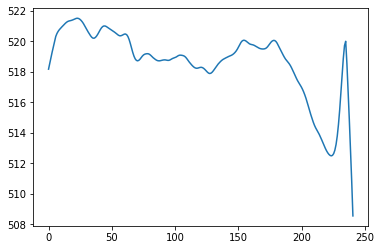

In [ ]:
plt.plot(df['Position'],df['0.005'])
plt.show()

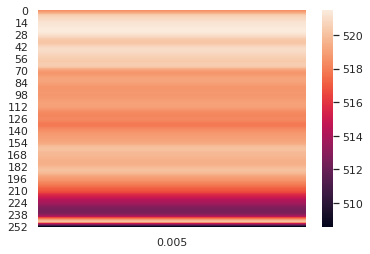

In [ ]:
import seaborn as sns; sns.set_theme()
uniform_data = df[['0.005']]
ax = sns.heatmap(uniform_data)

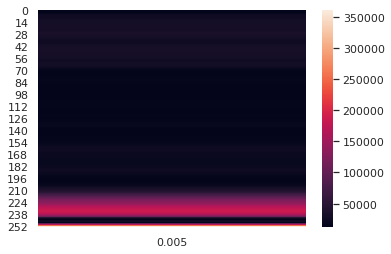

In [ ]:
uniform_data = df2[['0.005']]
ax = sns.heatmap(uniform_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  """Entry point for launching an IPython kernel.


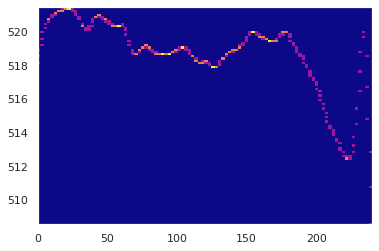

In [ ]:
plt.hist2d(df['Position'],df['0.005'],bins=100,normed=False,cmap='plasma')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  """Entry point for launching an IPython kernel.


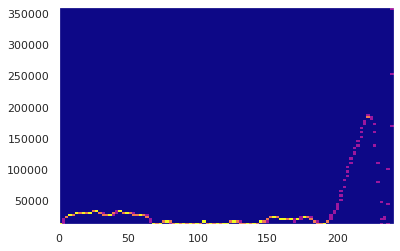

In [ ]:
plt.hist2d(df['Position'],df2['0.005'],bins=100,normed=False,cmap='plasma')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

#X = df.drop(columns = ['SalePrice']).copy()
#y = df['SalePrice']
X = df.iloc[:,0:13]
y = df2.iloc[:,13]

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(203, 13)
(203,)
(25, 13)
(25,)
(26, 13)
(26,)


(None, None)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [ ]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=1, verbose=0)
kfold = KFold(n_splits=10)
#results = cross_val_score(estimator, X_train, y_train, cv=kfold)
results = cross_val_score(estimator, X_train, y_train)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -22558989363.20 (18019894211.23) MSE
